In [ ]:
import pandas as pd
df=pd.read_csv("/content/Crop_recommendation.csv")

In [ ]:
df.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.label=le.fit_transform(df.label)

In [ ]:
df.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20


In [ ]:
X=df.iloc[:,:7]
y=df['label']

In [ ]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error: 31.47
R-squared: 0.26
Mean Absolute Error (MAE): 4.43


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,classification_report
logreg = LogisticRegression(solver='lbfgs',max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg1 = round(accuracy_score(y_pred, y_test) , 2)*100
print("Accuracy : ",acc_logreg1)

Accuracy :  95.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred,y_test), 2) * 100
print("Accuracy :" ,acc_knn)

Accuracy : 97.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 6, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
acc_logreg2 = round(accuracy_score(y_pred, y_test) , 2)*100
print("Accuracy : ",acc_logreg2)

Accuracy :  99.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
acc_dt = round(accuracy_score(y_pred, y_test) * 100, 2)
print("Accuracy: ", acc_dt)

Accuracy:  98.64


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(y_pred,y_test)
from sklearn.tree import DecisionTreeClassifier, export_text
classifier = DecisionTreeClassifier()

classifier.fit(X, y)
tree_rules = export_text(classifier, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- humidity <= 27.69
|   |--- K <= 50.00
|   |   |--- class: 9
|   |--- K >  50.00
|   |   |--- class: 3
|--- humidity >  27.69
|   |--- K <= 125.00
|   |   |--- rainfall <= 30.39
|   |   |   |--- class: 15
|   |   |--- rainfall >  30.39
|   |   |   |--- humidity <= 70.81
|   |   |   |   |--- N <= 59.50
|   |   |   |   |   |--- rainfall <= 82.10
|   |   |   |   |   |   |--- humidity <= 60.02
|   |   |   |   |   |   |   |--- class: 13
|   |   |   |   |   |   |--- humidity >  60.02
|   |   |   |   |   |   |   |--- rainfall <= 57.68
|   |   |   |   |   |   |   |   |--- P <= 52.00
|   |   |   |   |   |   |   |   |   |--- class: 13
|   |   |   |   |   |   |   |   |--- P >  52.00
|   |   |   |   |   |   |   |   |   |--- temperature <= 30.17
|   |   |   |   |   |   |   |   |   |   |--- class: 10
|   |   |   |   |   |   |   |   |   |--- temperature >  30.17
|   |   |   |   |   |   |   |   |   |   |--- class: 13
|   |   |   |   |   |   |   |--- rainfall >  57.68
|   |   |

In [ ]:
#MultinominalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
acc_nb = round(accuracy_score(y_pred, y_test) * 100, 2)
print("Accuracy : ", acc_nb)

Accuracy :  99.55


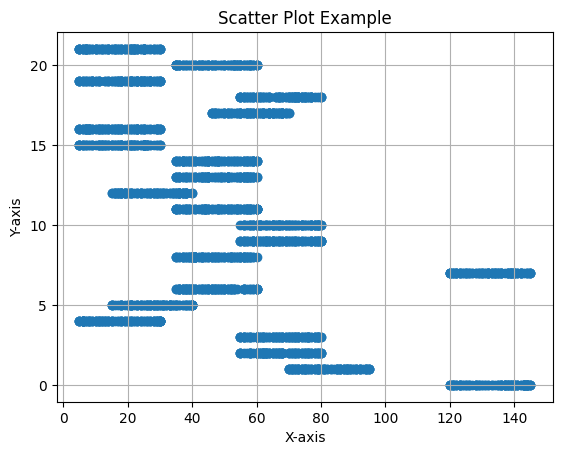

In [ ]:
import matplotlib.pyplot as plt

x = df['P']
y=df['label']

plt.scatter(x, y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot Example")
plt.grid(True)
plt.show()


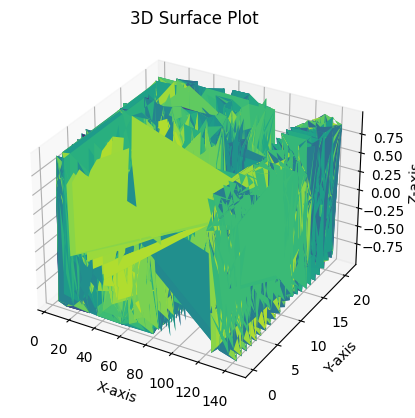

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = df['P']
y=df['label']

X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("3D Surface Plot")

plt.show()


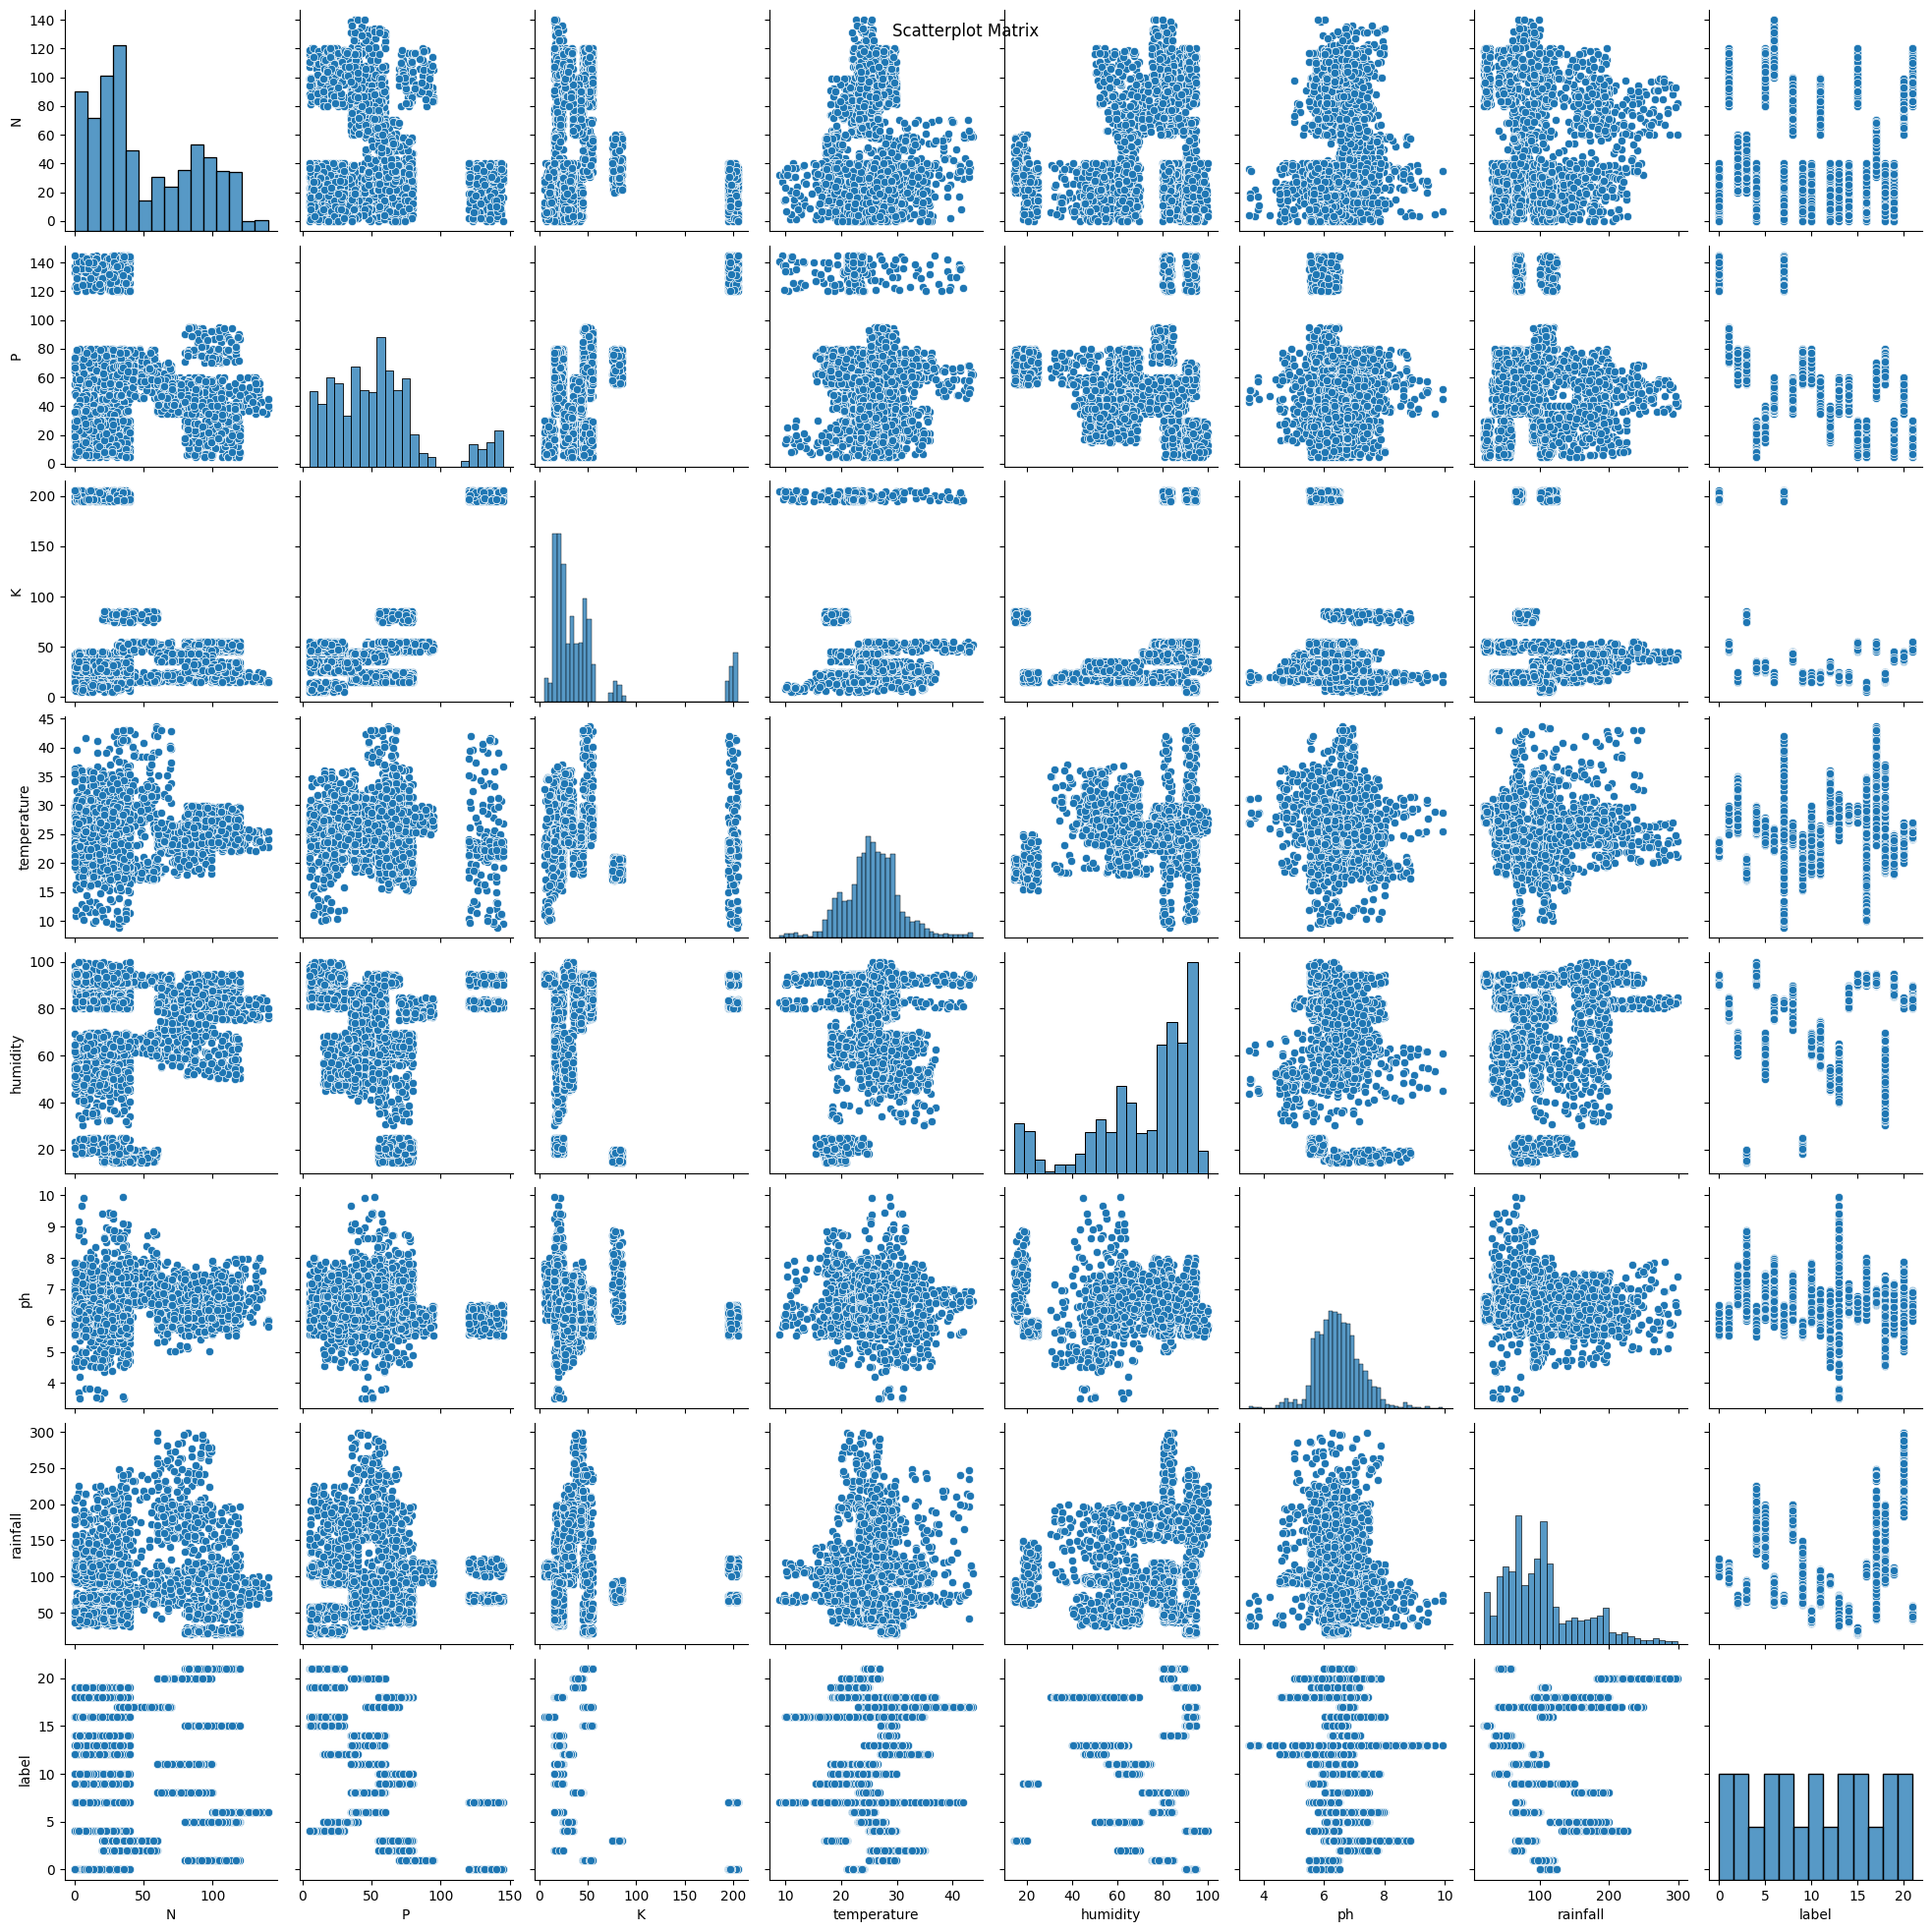

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a pandas DataFrame named 'df' with your data
# Load your data here

# Create a Scatterplot Matrix (SPLOM)
sns.pairplot(df, kind="scatter", markers="o")

# Customize the SPLOM (optional)
plt.suptitle("Scatterplot Matrix")
plt.show()
